In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import confusion_matrix , classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
hd=pd.read_csv("/content/heart_disease_uci.csv")

In [3]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
hd.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
hd.groupby("num").mean()

,id,age,trestbps,chol,thalch,oldpeak,ca
num,,,,,,,
0,355.257908,50.547445,129.913043,227.905612,148.800512,0.418205,0.278788
1,542.898113,53.528302,132.861111,195.255814,131.035714,1.001200,0.741379
2,554.449541,57.577982,133.613861,143.859813,128.666667,1.353465,1.222222
3,560.467290,59.214953,136.152174,159.716981,120.500000,1.581319,1.459459
4,477.714286,59.214286,138.720000,192.148148,127.846154,2.307692,1.692308


In [6]:
hd["num"].unique()

array([0, 2, 1, 3, 4])

In [7]:
hd.shape

(920, 16)

In [8]:
hd.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

data cleaning

In [9]:
hd=hd.drop(columns=['dataset','id'])

In [10]:
a=hd.trestbps.median()
a

130.0

In [11]:
hd['trestbps'].fillna(a,inplace=True)

In [12]:
b=hd['chol'].mean()
b=round(b,0)
b

199.0

In [13]:
hd["chol"].fillna(b,inplace=True)

In [14]:
c=hd['fbs'].mode().values[0]
c

False

In [15]:
hd['fbs'].fillna(c,inplace=True)

In [16]:
d=hd['restecg'].mode().values[0]
d

'normal'

In [17]:
hd['restecg'].fillna(d,inplace=True)

In [18]:
e=hd['thalch'].mean()
e=round(e,0)
e

138.0

In [19]:
hd['thalch'].fillna(e,inplace=True)#The person's maximum heart rate achieved

In [20]:
f=hd['exang'].mode().values[0]#pain in the chest that comes on with exercise, stress, or other things
f

False

In [21]:
hd['exang'].fillna(f,inplace=True)

In [22]:
g=hd['oldpeak'].mode().values[0]
g

0.0

In [23]:
hd['oldpeak'].fillna(g,inplace=True)

In [24]:
h=hd['slope'].mode().values[0]
h

'flat'

In [25]:
hd['slope'].fillna(h,inplace=True)

In [26]:
j=hd['ca'].median()
j

0.0

In [27]:
hd['ca'].fillna(j,inplace=True)

In [28]:
k=hd['thal'].mode().values[0]#too much iron in their bodies
k

'normal'

In [29]:
hd['thal'].fillna(k,inplace=True)

In [30]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [31]:
hd.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,131.995652,199.126087,137.572826,0.819565,0.227174,0.995652
std,9.424685,18.451300,108.957636,25.138725,1.076582,0.628936,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,221.000000,138.000000,0.200000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [32]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Data Visualisation

Text(0.5, 1.0, 'age vs trestbps')

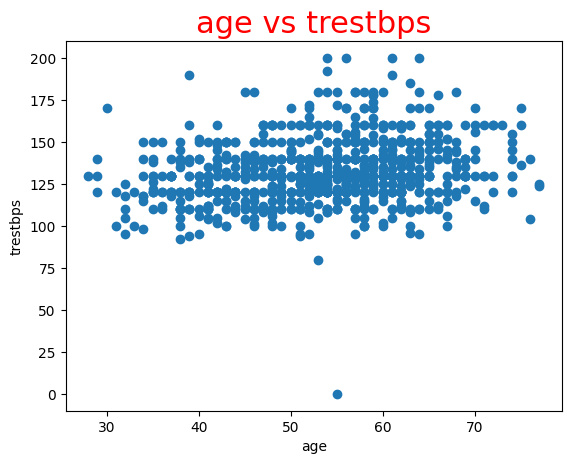

In [33]:
x=hd.age
y=hd.trestbps
plt.scatter(x,y)
plt.xlabel("age")
plt.ylabel("trestbps")
plt.title("age vs trestbps",fontsize=22,color='r')

Text(0.5, 1.0, 'age vs chol')

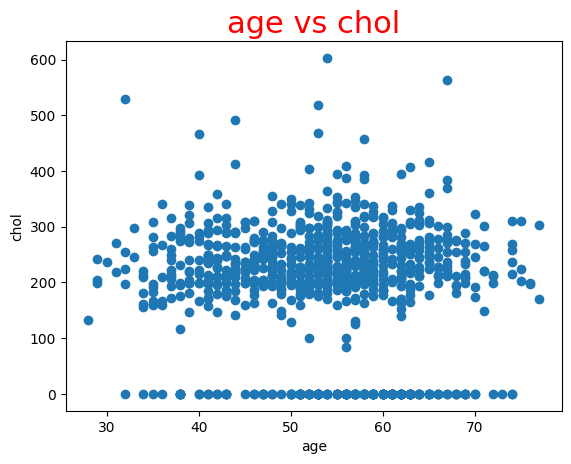

In [34]:
x=hd.age
y=hd.chol
plt.scatter(x,y)
plt.xlabel("age")
plt.ylabel("chol")
plt.title("age vs chol",fontsize=22,color='r')

Text(0.5, 1.0, 'age vs thalch')

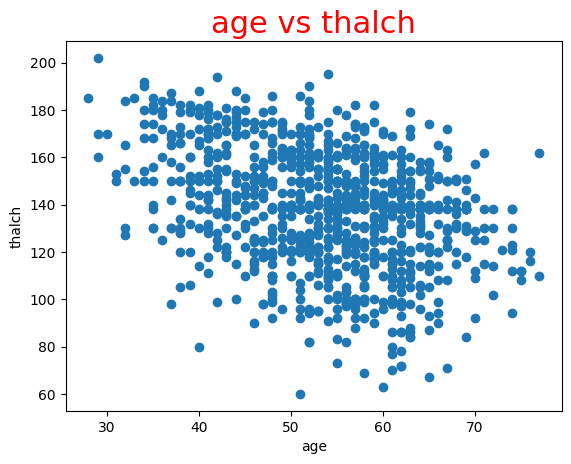

In [35]:
x=hd.age
y=hd.thalch
plt.scatter(x,y)
plt.xlabel("age")
plt.ylabel("thalch")
plt.title("age vs thalch",fontsize=22,color='r')

Text(0.5, 1.0, 'age vs num')

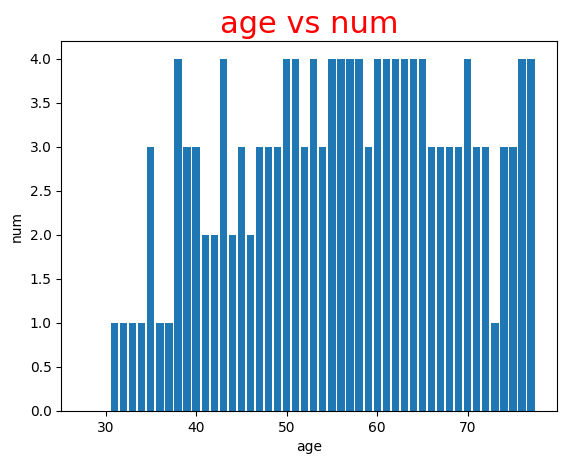

In [36]:
x=hd.age
y=hd.num
plt.bar(x,y)
plt.xlabel("age")
plt.ylabel("num")
plt.title("age vs num",fontsize=22,color='r')

<Axes: xlabel='age', ylabel='chol'>

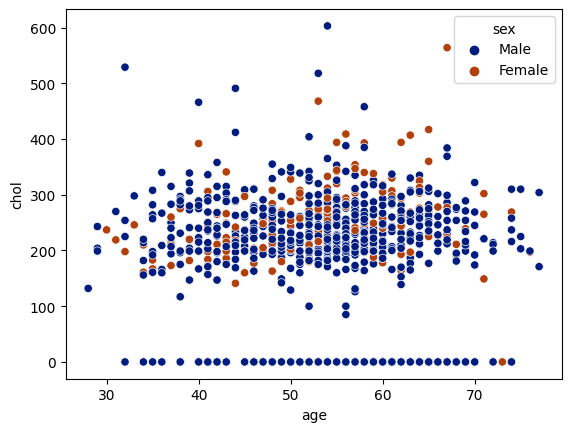

In [37]:
sns.scatterplot(data=hd,x='age',y='chol',hue='sex',palette='dark')

<Axes: xlabel='age', ylabel='thalch'>

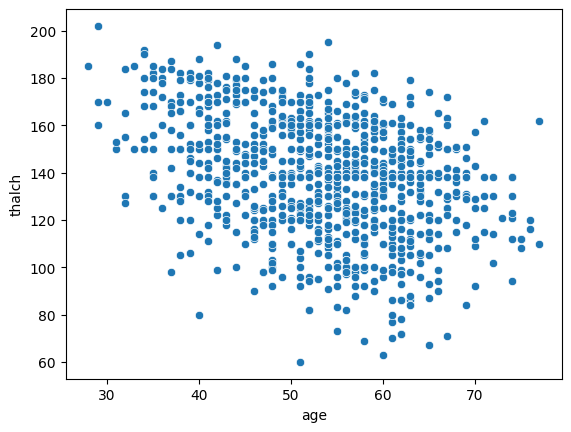

In [38]:
sns.scatterplot(data=hd,x='age',y='thalch')

<Axes: xlabel='age', ylabel='chol'>

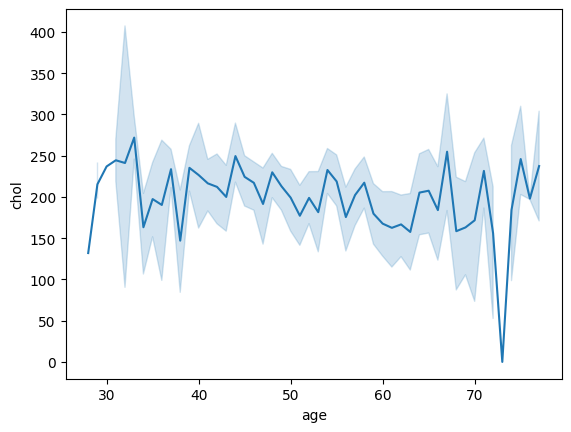

In [39]:
sns.lineplot(data=hd,x='age',y='chol')

<Axes: xlabel='age', ylabel='thalch'>

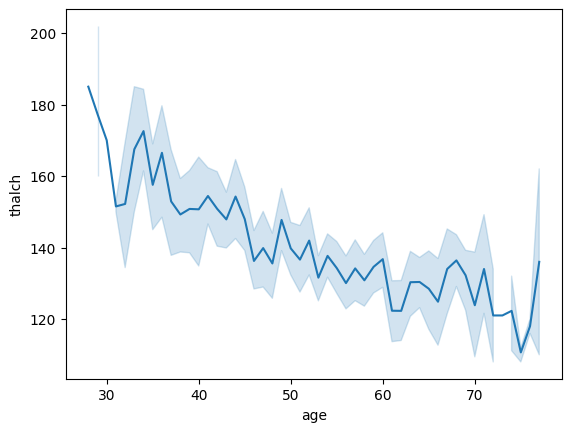

In [40]:
sns.lineplot(data=hd,x='age',y='thalch')

<Axes: xlabel='num', ylabel='count'>

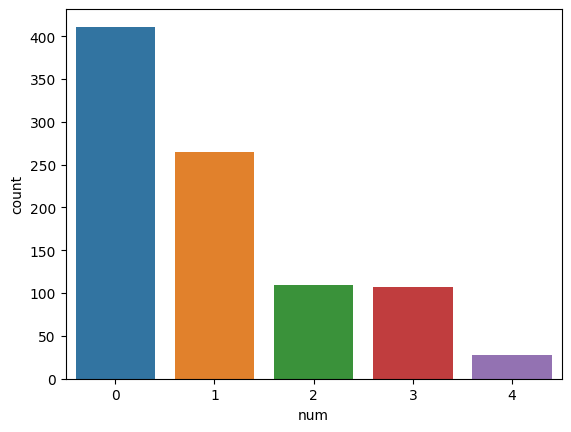

In [41]:
sns.countplot(x="num",data=hd)

'fixed defect : no blood flow in some part of the heart)\nValue 2: normal blood flow.\nValue 3: reversible defect (a blood flow is observed but it is not normal)'

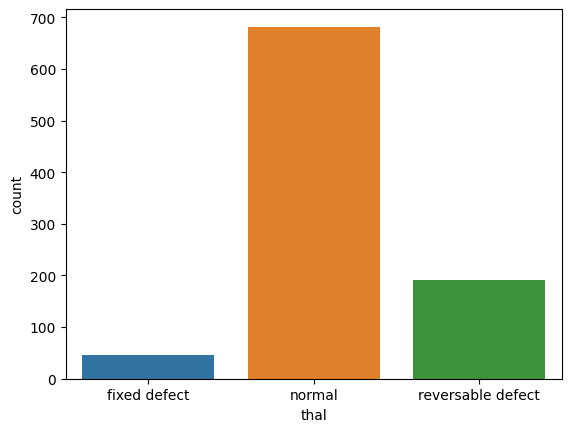

In [42]:
sns.countplot(x="thal",data=hd)
'''fixed defect : no blood flow in some part of the heart)
Value 2: normal blood flow.
Value 3: reversible defect (a blood flow is observed but it is not normal)'''

<Axes: xlabel='num', ylabel='age'>

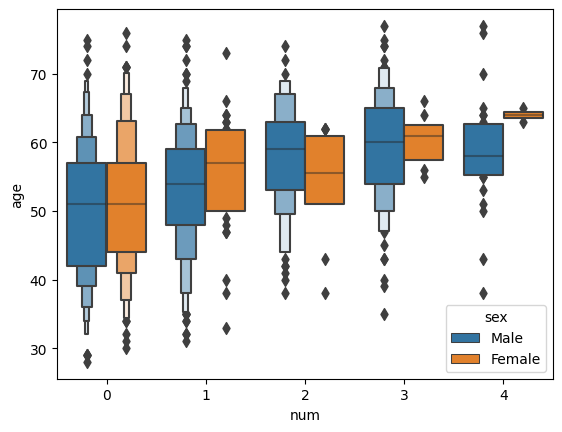

In [43]:
sns.boxenplot(data=hd,x="num",y="age",hue='sex')

<Axes: xlabel='sex', ylabel='chol'>

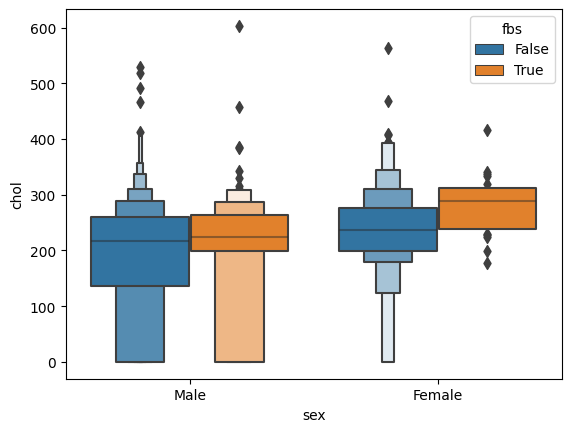

In [44]:
sns.boxenplot(data=hd,x="sex",y="chol",hue='fbs')

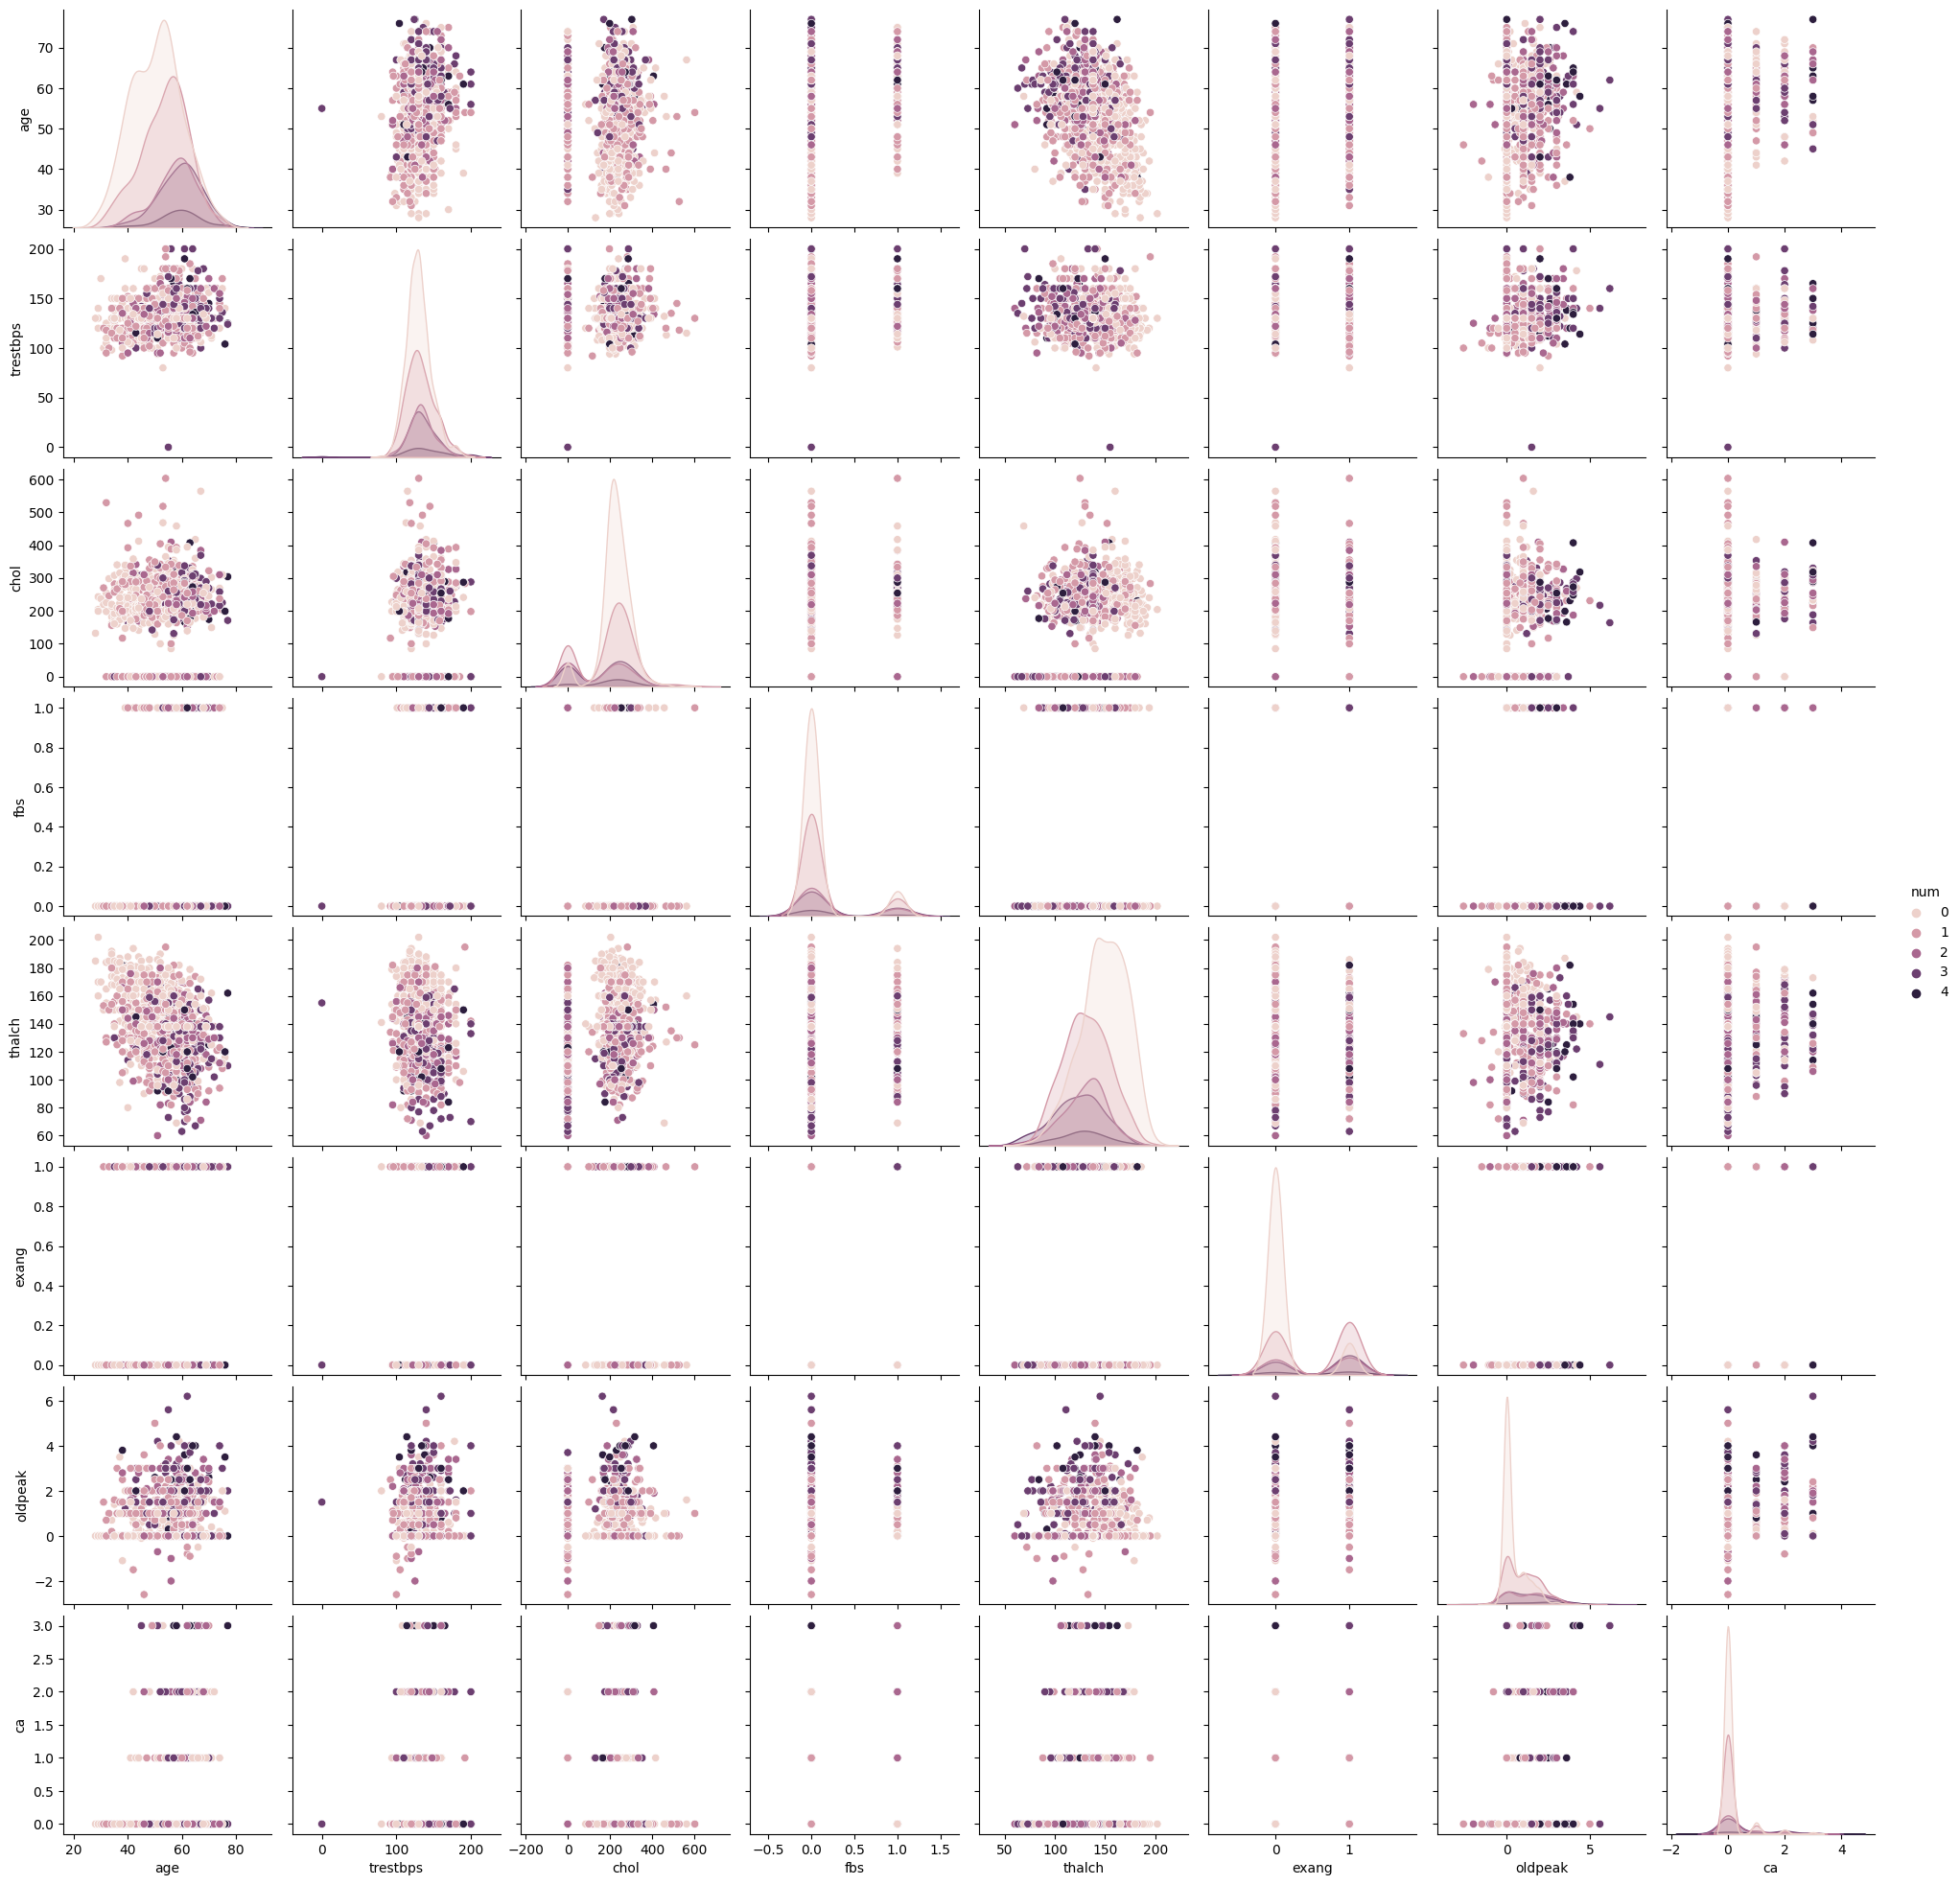

In [45]:

sns.pairplot(data=hd,hue='num')
plt.show()

In [46]:
corr_matrix=hd.corr()

In [47]:
corr_matrix

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
age,1.000000,0.230784,-0.084490,0.219915,-0.352790,0.160910,0.211978,0.219413,0.339596
trestbps,0.230784,1.000000,0.089122,0.143709,-0.104259,0.153835,0.161365,0.039092,0.113178
chol,-0.084490,0.089122,1.000000,0.089719,0.226300,-0.031459,0.054179,0.155226,-0.228224
fbs,0.219915,0.143709,0.089719,1.000000,-0.029568,-0.003475,0.012731,0.061260,0.129539
thalch,-0.352790,-0.104259,0.226300,-0.029568,1.000000,-0.350646,-0.144088,0.039937,-0.350721
exang,0.160910,0.153835,-0.031459,-0.003475,-0.350646,1.000000,0.408454,0.037478,0.350567
oldpeak,0.211978,0.161365,0.054179,0.012731,-0.144088,0.408454,1.000000,0.225969,0.393327
ca,0.219413,0.039092,0.155226,0.061260,0.039937,0.037478,0.225969,1.000000,0.261797
num,0.339596,0.113178,-0.228224,0.129539,-0.350721,0.350567,0.393327,0.261797,1.000000


<Axes: >

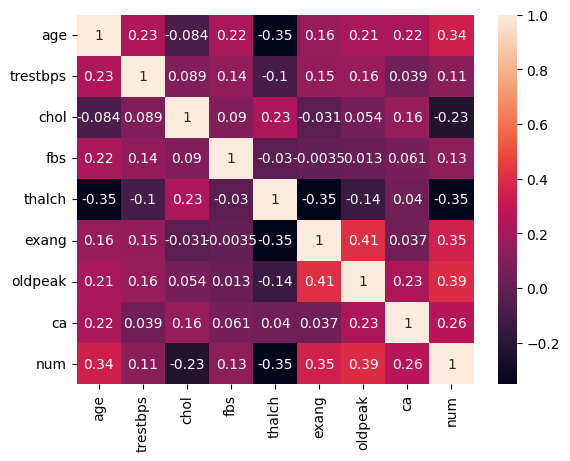

In [48]:
sns.heatmap(corr_matrix,annot=True)

Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
hd['sex']=le.fit_transform(hd['sex'])
hd['cp']=le.fit_transform(hd['cp'])
hd['fbs']=le.fit_transform(hd['fbs'])
hd['restecg']=le.fit_transform(hd['restecg'])
hd['exang']=le.fit_transform(hd['exang'])
hd['slope']=le.fit_transform(hd['slope'])
hd['thal']=le.fit_transform(hd['thal'])

In [50]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


Data Normalisation

In [51]:
i=hd.iloc[:,0:13]
d=hd.num

In [52]:
i.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1


In [53]:
std = StandardScaler()
std.fit(i)
std_data= std.transform(i)
print(std_data)

[[ 1.00738556  0.51693097  2.31986001 ... -2.23408054 -0.36139973
  -2.39781342]
 [ 1.43203377  0.51693097 -0.81877412 ... -0.29506724  4.41115177
  -0.32840597]
 [ 1.43203377  0.51693097 -0.81877412 ... -0.29506724  2.82030127
   1.74100149]
 ...
 [ 0.15808914  0.51693097 -0.81877412 ... -0.29506724 -0.36139973
  -2.39781342]
 [ 0.4765753   0.51693097 -0.81877412 ... -0.29506724 -0.36139973
  -0.32840597]
 [ 0.90122351  0.51693097  0.22743726 ... -0.29506724 -0.36139973
  -0.32840597]]


In [54]:
i = std_data
i

array([[ 1.00738556,  0.51693097,  2.31986001, ..., -2.23408054,
        -0.36139973, -2.39781342],
       [ 1.43203377,  0.51693097, -0.81877412, ..., -0.29506724,
         4.41115177, -0.32840597],
       [ 1.43203377,  0.51693097, -0.81877412, ..., -0.29506724,
         2.82030127,  1.74100149],
       ...,
       [ 0.15808914,  0.51693097, -0.81877412, ..., -0.29506724,
        -0.36139973, -2.39781342],
       [ 0.4765753 ,  0.51693097, -0.81877412, ..., -0.29506724,
        -0.36139973, -0.32840597],
       [ 0.90122351,  0.51693097,  0.22743726, ..., -0.29506724,
        -0.36139973, -0.32840597]])

In [55]:
d

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int64

In [56]:
i_train,i_test,d_train,d_test = train_test_split(i,d,test_size=0.3,stratify=d, random_state=10)

In [57]:
print(i_train.shape,d_train.shape,i_test.shape,d_test.shape)

(644, 13) (644,) (276, 13) (276,)


Accuracy Score for Different Model

Support Vector Machine

In [58]:
svc_obj = svm.SVC()
svc_obj.fit(i_train,d_train)
print("SVC model accuracy ")
svc_obj.score(i_test,d_test)

SVC model accuracy 


0.572463768115942

Random Forest Classifier

In [59]:
ran_obj = RandomForestClassifier()
ran_obj.fit(i_train,d_train)
print("Random Forest Classifier accuracy")
ran_obj.score(i_test,d_test)

Random Forest Classifier accuracy


0.6159420289855072

Naive Bayes Classifier

In [60]:
nb_classifier = GaussianNB()
nb_classifier.fit(i_train, d_train)
print("Naive Bayes classifier accuracy")
nb_classifier.score(i_test,d_test)

Naive Bayes classifier accuracy


0.5615942028985508

Logistic Regression

In [61]:
logreg_obj = LogisticRegression()
logreg_obj.fit(i_train,d_train)
print("Logistic Regression accuracy")
logreg_obj.score(i_test,d_test)

Logistic Regression accuracy


0.5579710144927537

Decision Tree

In [62]:
dtree = DecisionTreeClassifier()
dtree.fit(i_train, d_train)
print("Decision Tree accuracy")
dtree.score(i_test,d_test)

Decision Tree accuracy


0.47101449275362317

# Predictive System

In [63]:
new_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,0)

input_array = np.asarray(new_data)

data_reshape = input_array.reshape(1,-1)

std_input = std.transform(data_reshape)

prd = ran_obj.predict(data_reshape)

if (prd[0]==0):
  print("The Person not have heart disease")
else:
  print("The Person likely to have heart disease")

The Person not have heart disease


In [64]:
import joblib

In [65]:
joblib.dump(ran_obj, 'ran_model.joblib')

['ran_model.joblib']

In [66]:
joblib.dump(std, 'std_heart.joblib')

['std_heart.joblib']